In [11]:
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("flight_price_prediction.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [14]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [15]:
df.rename(columns={'class': 'flight_class'}, inplace=True)

In [16]:
df.drop(columns='Unnamed: 0', inplace=True)

In [17]:
df.drop(columns='flight', inplace=True)

In [18]:
df.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [19]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [20]:
df.airline = df.airline.replace(
    {'Vistara' :1,
    'Air_India' :2,
    'Indigo' :3,
    'GO_FIRST' :4,
    'AirAsia':5,
    'SpiceJet' :6 })

In [21]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [22]:
df.departure_time =df.departure_time.replace(
    {'Morning' : 1,
        'Early_Morning':2, 
        'Evening':3,
        'Night':4,
        'Afternoon': 5, 
        'Late_Night':6})

In [23]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [24]:
df.stops = df.stops.replace(
    {'one' :1,
    'zero' :2,
    'two_or_more':3 })

In [25]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [26]:
df.arrival_time = df.arrival_time.replace(
    {'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6})

In [27]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [28]:
df.destination_city = df.destination_city.replace(
    {'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6})

In [29]:
df['flight_class'].value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

In [30]:
df.flight_class = df.flight_class.replace(
    {'Economy' : 1,
        'Business' :2})

In [31]:
df.source_city =df.source_city.replace(
    {'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        'Chennai' : 6})

In [32]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,6,1,3,2,1,1,1,2.17,1,5953
1,6,1,2,2,3,1,1,2.33,1,5953
2,5,1,2,2,5,1,1,2.17,1,5956
3,1,1,1,2,4,1,1,2.25,1,5955
4,1,1,1,2,3,1,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,1,6,1,1,2,5,2,10.08,49,69265
300149,1,6,5,1,1,5,2,10.42,49,77105
300150,1,6,2,1,1,5,2,13.83,49,79099
300151,1,6,2,1,2,5,2,10.00,49,81585


In [33]:
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,2.153072,3.201487,2.794901,1.208480,2.498846,3.268316,1.311464,12.221021,26.004751,20889.660523
std,1.348357,1.684757,1.401659,0.503533,1.407841,1.688644,0.463093,7.191997,13.561004,22697.767366
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,1.000000,1105.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.830000,15.000000,4783.000000
50%,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,3.000000,5.000000,4.000000,1.000000,3.000000,5.000000,2.000000,16.170000,38.000000,42521.000000
max,6.000000,6.000000,6.000000,3.000000,6.000000,6.000000,2.000000,49.830000,49.000000,123071.000000


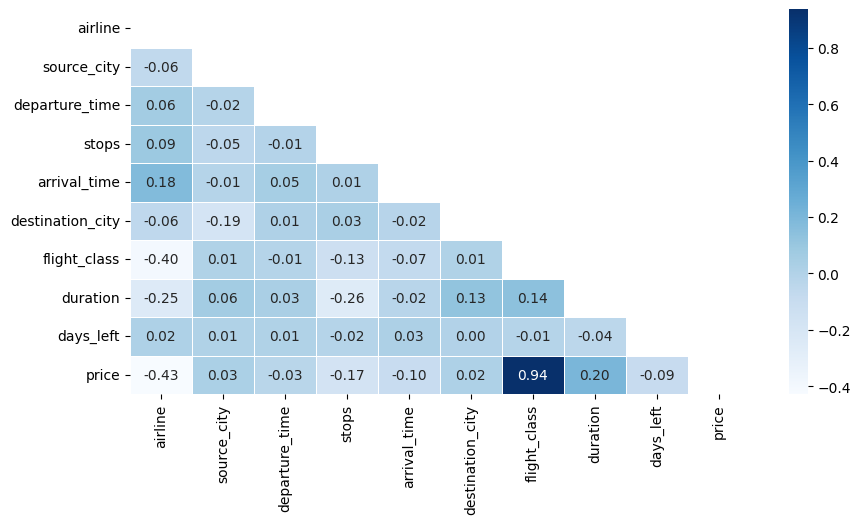

In [34]:
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

In [35]:
x=df.drop('price', axis=1)
y=df['price']

In [36]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x = pd.DataFrame(x_scaled, columns=x.columns)

In [37]:
x.describe().T[['min', 'mean', 'std', '50%', 'max']]

,min,mean,std,50%,max
airline,0.0,0.230614,0.269671,0.200000,1.0
source_city,0.0,0.440297,0.336951,0.400000,1.0
departure_time,0.0,0.358980,0.280332,0.400000,1.0
stops,0.0,0.104240,0.251766,0.000000,1.0
arrival_time,0.0,0.299769,0.281568,0.200000,1.0
destination_city,0.0,0.453663,0.337729,0.400000,1.0
flight_class,0.0,0.311464,0.463093,0.000000,1.0
duration,0.0,0.232470,0.146775,0.212653,1.0
days_left,0.0,0.520932,0.282521,0.520833,1.0


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [39]:
linear_regression=LinearRegression()
lin_reg_model=linear_regression.fit(x_train,y_train)
lin_reg_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
y_pred_train = lin_reg_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
r2_value = r2_score(y_train, y_pred_train)
print("R-squared :",r2_value)

MSE : 54026845.98557572
RMSE : 7350.2956393315035
MAE : 4546.581988501732
R-squared : 0.8950400838420377


In [41]:
dt_reg_model = DecisionTreeRegressor(criterion='squared_error', max_depth=None,
                min_samples_split=2,
                min_samples_leaf=1
            )
dt_reg_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [42]:
y_pred_train = dt_reg_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)
print("RMSE :",np.sqrt(mse))
print("MAE : ",mean_absolute_error(y_train, y_pred_train))
print("R-Squared :", dt_reg_model.score(x_train, y_train))

MSE : 377375.2330711055
RMSE : 614.3087440946169
MAE :  58.969444698944706
R-Squared : 0.9992668594270002


[0.01121524 0.009745   0.00420404 0.00168787 0.00525446 0.01059224
 0.88001534 0.05877565 0.01851016]


<Axes: >

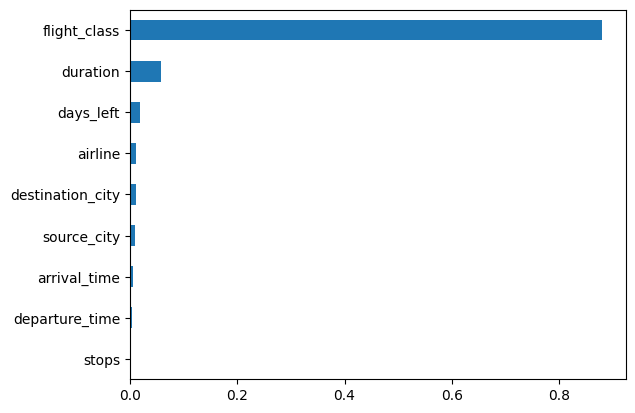

In [43]:
print(dt_reg_model.feature_importances_)
s1 = pd.Series(dt_reg_model.feature_importances_, index = x.columns)
s1.sort_values().plot(kind = 'barh')

In [44]:
#hyper_parameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV

dt_reg = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]}

gscv = GridSearchCV(
    dt_reg,
    param_grid,
    cv=5,          # much faster than 20
    n_jobs=-1,     # use all CPU cores
    verbose=1)

gscv.fit(x_train, y_train)

print("Best Parameters:", gscv.best_params_)

best_dt = gscv.best_estimator_
y_pred = best_dt.predict(x_test)

print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test R2:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Test RMSE: 3017.261431607129
Test R2: 0.9823902445169286


In [46]:
y_pred_train = dt_reg_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :", mse)
print("RMSE :",np.sqrt(mse))
print("MAE : ",mean_absolute_error(y_train, y_pred_train))
print("R-Squared :", dt_reg_model.score(x_train, y_train))

MSE : 377375.2330711055
RMSE : 614.3087440946169
MAE :  58.969444698944706
R-Squared : 0.9992668594270002


#### user input

In [47]:
import pickle

with open("flight_price_model.pkl", "wb") as f:
    pickle.dump(best_dt, f)

In [48]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [49]:
airline_map = {
    'Vistara': 1, 'Air India': 2, 'Indigo': 3,
    'GO FIRST': 4, 'AirAsia': 5, 'SpiceJet': 6
}

city_map = {
    'Delhi': 1, 'Mumbai': 2, 'Bangalore': 3,
    'Kolkata': 4, 'Hyderabad': 5, 'Chennai': 6
}

departure_time_map = {
    'Morning': 1, 'Early Morning': 2, 'Evening': 3,
    'Night': 4, 'Afternoon': 5, 'Late Night': 6
}

arrival_time_map = {
    'Night': 1, 'Evening': 2, 'Morning': 3,
    'Afternoon': 4, 'Early Morning': 5, 'Late Night': 6
}

stops_map = {
    'Zero': 0, 'One': 1, 'Two or More': 2
}

flight_class_map = {
    'Economy': 1, 'Business': 2
}


In [52]:
import pandas as pd

feature_order = [
    'airline', 'source_city', 'departure_time', 'stops',
    'arrival_time', 'destination_city', 'flight_class',
    'duration', 'days_left'
]

def predict_flight_price(user_input: dict):

    user_input['airline'] = airline_map[user_input['airline']]
    user_input['source_city'] = city_map[user_input['source_city']]
    user_input['destination_city'] = city_map[user_input['destination_city']]
    user_input['departure_time'] = departure_time_map[user_input['departure_time']]
    user_input['arrival_time'] = arrival_time_map[user_input['arrival_time']]
    user_input['stops'] = stops_map[user_input['stops']]
    user_input['flight_class'] = flight_class_map[user_input['flight_class']]

    df = pd.DataFrame([user_input])
    df = df[feature_order]

    df_scaled = scaler.transform(df)

    prediction = best_dt.predict(df_scaled)

    return round(prediction[0], 2)


In [53]:
test_input = {
    'airline': 'Indigo',
    'source_city': 'Delhi',
    'departure_time': 'Morning',
    'stops': 'Zero',
    'arrival_time': 'Evening',
    'destination_city': 'Bangalore',
    'flight_class': 'Economy',
    'duration': 2.5,
    'days_left': 15
}

print(" Predicted Price:", predict_flight_price(test_input))


 Predicted Price: 4590.83
